In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
%precision 4
import os, sys, glob

## Exercise 1: 

#### Create data set

In [13]:
a0 = np.random.normal(0, 1, 100) 
a1 = a0 + np.random.normal(0, 3, 100)
a2 = 2*a0 + a1
#created 3 vectors of data a0, a1, and a2 that are all 100 values in length

A = np.row_stack([a0, a1, a2]) #places data into a matrix stacking each variable as a row (not column)
A = A - A.mean(0) # normalizes so that the mean is 0
A.shape

(3, 100)

## Exercise 2:

#### Find eigenvalues and vectors of covariance matrix

In [18]:
import scipy.linalg as la

M = np.cov(A)
e, v = la.eig(M)
print(e) #this will be complex numbers
print(v) #this will be in order os a0, a1, a2

[5.0753e+00+0.j 9.1624e-16+0.j 1.5239e+00+0.j]
[[-0.8073  0.5774  0.1221]
 [ 0.2979  0.5774 -0.7602]
 [ 0.5094  0.5774  0.6381]]


In [20]:
idx = np.argsort(e)[::-1] #creating an index that goes in the order that is largest to smallest based on the eigenvalues
# in this case it sorts to [0, 2, 1]
e = e[idx] #orders eigen values based on index a0, a2, a1
e = np.real_if_close(e) #adjusts eigenvalues to be real numbers
v = v[:, idx] #adjusts the eigenvectors to correspond to eigenvalues

print(M)
print(e)
print(v)

[[ 3.3305 -1.362  -1.9685]
 [-1.362   1.3311  0.0309]
 [-1.9685  0.0309  1.9376]]
[5.0753e+00 1.5239e+00 9.1624e-16]
[[-0.8073  0.1221  0.5774]
 [ 0.2979 -0.7602  0.5774]
 [ 0.5094  0.6381  0.5774]]


## Exercise 4: 

#### Percent of variance explained

In [36]:
exp_var = np.cumsum(e)/e.sum() #variance explained by 1, then 1+2, and then all
print (exp_var) 
# note: a2 is a linear combination of a1
# and a0 explains part of the variance of a1 by construction

[0.7691 1.     1.    ]


#### Change of basis, and dimension reduction

In [37]:
v.dot(np.diag(e).dot(v.T))
                  
B1 = v.T.dot(A) # in PCA coordinates (change of basis)

e[2:] = 0 #setting 3rd eigenvalue equal to 0
A1 = v.dot(np.diag(e).dot(B1)) # in original coorindate with dimension reduction
# so data technically exists in 3 dimensions but we've set the third dimension equal to 0

## Exercise 5:

#### Plot the data with reduced dimension

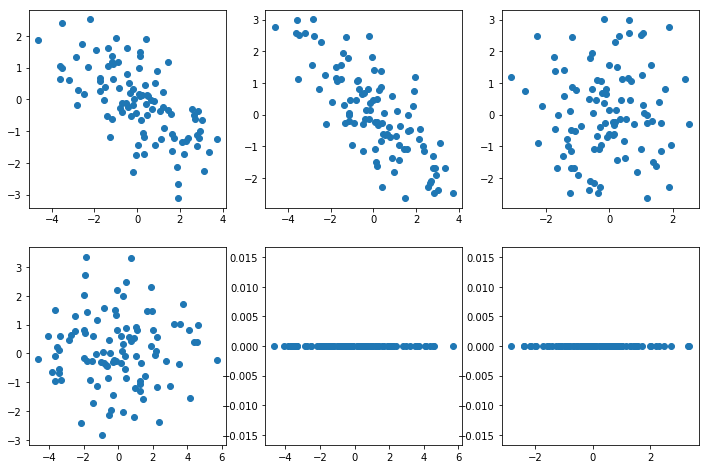

In [35]:
plt.figure(figsize=(12, 8))
dims = [(0,1), (0,2), (1,2)]
for k, dim in enumerate(dims):
    plt.subplot(2, 3, k+1)
    plt.scatter(A[dim[0], :], A[dim[1], :])
    plt.subplot(2, 3, k+4)
    plt.scatter(B1[dim[0], :], B1[dim[1], :])